In [310]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import sys
from src.modules import conf, fit, spec, evl, pred, preprocess
import seaborn as sns
import matplotlib.pyplot as plt
from src.heuristics import random_shooting
from src.heuristics import genetic_optimization
import sklearn

In [311]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [312]:
%matplotlib inline
sns.set(style='ticks')
plt.rcParams['figure.figsize'] = [24, 8]
plt.rcParams['figure.dpi']

100.0

In [313]:
data = fit.load_pcls(
        conf["Athlete"]["name"],
        conf["Athlete"]["activity_type"],
        conf["Paths"]["pcl"],
    )

100%|██████████| 361/361 [00:00<00:00, 1326.61it/s]


In [314]:
train_df = fit.clean_data(data[fit.get_race_index(data, '2022-10-02-10-30')])
test_df = fit.clean_data(data[fit.get_race_index(data, '2022-10-08-11-18')])
len(train_df),len(test_df)

(4413, 5653)

In [315]:
np.max(train_df.distance)

21072.49

In [316]:
if len(train_df.columns) > len(test_df.columns):
    cols = list(test_df.columns)
else:
    cols = list(train_df.columns)
cols.pop(cols.index('enhanced_speed'))

'enhanced_speed'

In [317]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# speed_train = train_df.enhanced_speed
# train_df.drop('enhanced_speed',axis=1,inplace=True)
linreg.fit(train_df[cols], speed_train)

LinearRegression()

In [318]:
speed = test_df.enhanced_speed
test_df.drop('enhanced_speed',axis=1,inplace=True)
y_pred = linreg.predict(test_df[cols])
y_pred = [x if x > 6 else np.mean(y_pred) for x in y_pred]

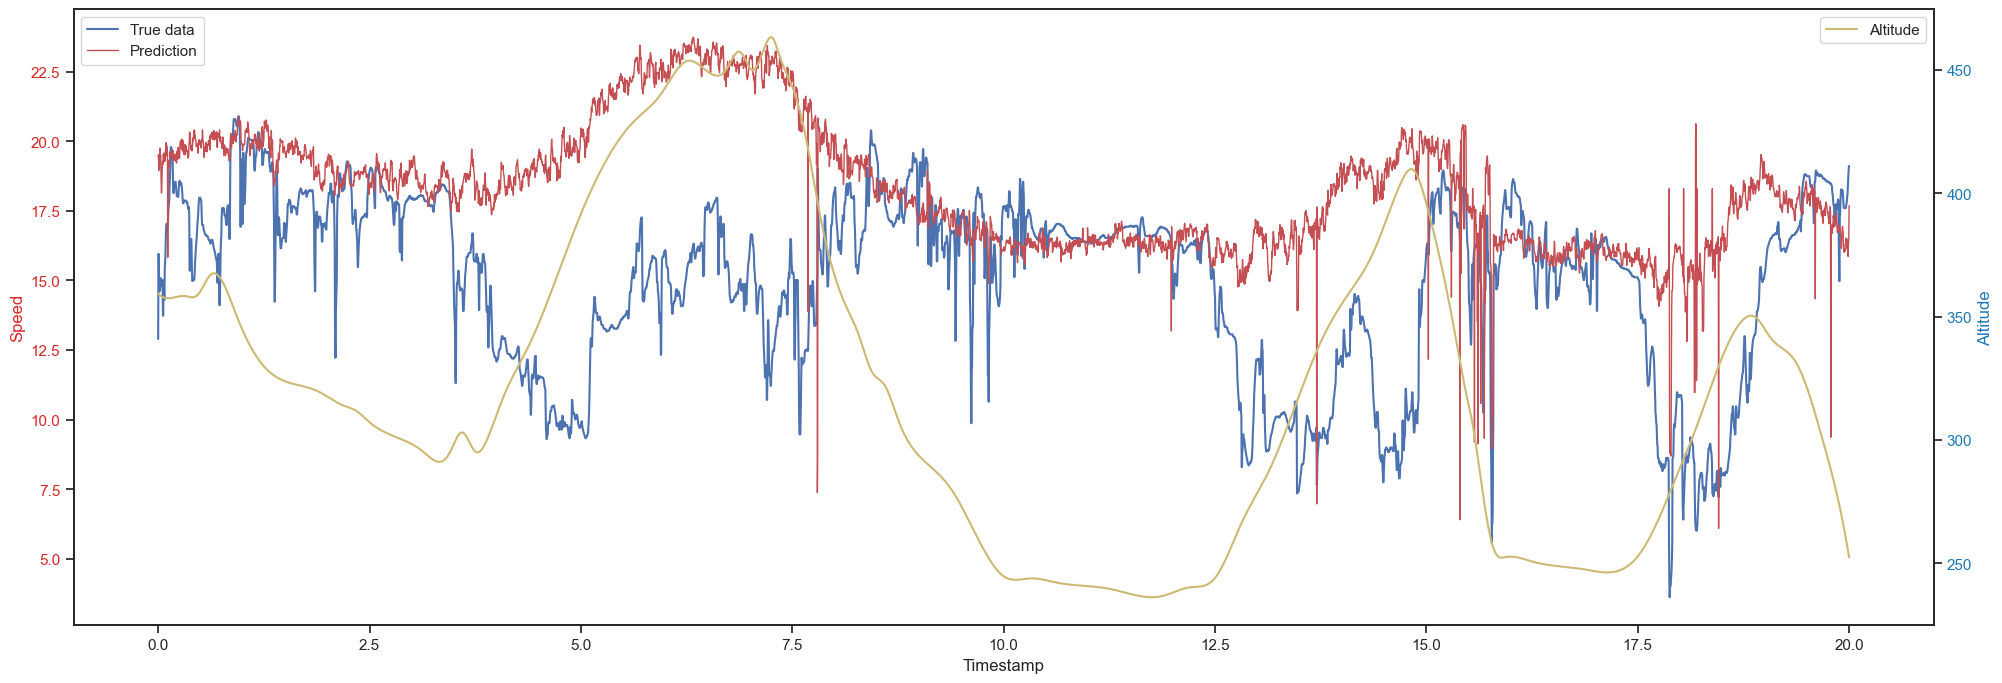

In [319]:
fig = evl.plot(df=test_df,pred=y_pred,endog='enhanced_speed',true_data=speed)